In [29]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
import warnings
warnings.filterwarnings('ignore')

import statsmodels.stats.multicomp as mc
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [30]:
def read_data(location):
    location = location[['id', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
      'availability_365', 'number_of_reviews', 'review_scores_rating', 'neighbourhood', 'neighbourhood_cleansed',
       'review_scores_accuracy', 'review_scores_value', 'wifi', 'parking', 'dryer', 'washer', 'kitchen', 'host_is_superhost', 'property_type']]
    return location

def get_stats(location):
    x = ['accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value', 'wifi', 'parking', 'dryer', 'washer', 'kitchen']
    location = location.loc[:, x]
    location_stats = location.describe()
    location_stats = pd.concat([location_stats.iloc[0:4], location_stats.iloc[7:]])
    return location_stats


def reorder(location):
    new = location.set_index('location', append = True).unstack(0)
    return new

In [31]:
nyc = pd.read_csv('data/listings.csv.gz')
nyc = nyc[nyc['price'].notna()]
nyc['price'] = nyc['price'].str.replace('$', '').str.replace(',', '').astype(float)

essentials =pd.read_csv('data/listing_essential_amenities.csv')
# Create new columns for 'wifi', 'parking', 'dryer', 'washer', 'kitchen' in the nyc dataframe
amenities_list = ['wifi', 'parking', 'dryer', 'washer', 'kitchen']

# Initialize new columns with default value False
for amenity in amenities_list:
    nyc[amenity] = False

# Update the new columns based on the 'amenities' column
for index, row in nyc.iterrows():
    amenities = row['amenities'].lower()
    for amenity in amenities_list:
        nyc.at[index, amenity] = amenity in amenities


In [81]:

brooklyn = nyc[nyc['neighbourhood_group_cleansed'] == 'Brooklyn']
brooklyn = brooklyn.reset_index().drop(columns=['index'])
brooklyn = read_data(brooklyn)



In [12]:
def get_neighborhood_stats(brooklyn):
    neighborhoods = brooklyn['neighbourhood_cleansed'].unique()
    stats_list = []
    
    for neighborhood in neighborhoods:
        neighborhood_stats = get_stats(brooklyn[brooklyn['neighbourhood_cleansed'] == neighborhood])
        neighborhood_stats['location'] = neighborhood
        neighborhood_stats = reorder(neighborhood_stats)
        stats_list.append(neighborhood_stats)
    
    statistics = pd.concat(stats_list)
    return statistics

statistics = get_neighborhood_stats(brooklyn)


statistics.index
statistics

accommodates                                 \
                                 count   max      mean  min       std   
location                                                                
Williamsburg                     893.0  16.0  2.492721  1.0  1.619390   
Fort Greene                      169.0  14.0  2.449704  1.0  1.735180   
Bedford-Stuyvesant              1698.0  16.0  2.732627  1.0  2.036585   
Greenpoint                       294.0  16.0  3.095238  1.0  1.894246   
Carroll Gardens                   77.0  12.0  3.519481  1.0  2.062257   
Park Slope                       163.0  12.0  3.245399  1.0  1.795371   
South Slope                       89.0   9.0  2.955056  1.0  1.580493   
Clinton Hill                     195.0  12.0  2.917949  1.0  1.884127   
Prospect Heights                  86.0  16.0  3.174419  1.0  2.666533   
Boerum Hill                       55.0   8.0  3.254545  1.0  1.417068   
Brooklyn Heights                  40.0   7.0  2.875000  1.0  1.417609   
Crown Heights                    733.0  16.0  3.313779  1.0  2.883397   
Gowanus                           87.0  16.0  3.482759  1.0  2.307027   
Bushwick                         840.0  16.0  2.398810  1.0  2.207204   
Downtown Brooklyn                 38.0   6.0  2.447368  1.0  1.057722   
Windsor Terrace                   49.0  12.0  3.612245  1.0  2.343576   
Flatbush                         263.0  13.0  2.300380  1.0  1.539889   
Sheepshead Bay                    83.0   8.0  2.759036  1.0  1.597180   
Bensonhurst                       36.0   9.0  3.416667  1.0  2.182724   
Sunset Park                      163.0  16.0  2.582822  1.0  1.894814   
Kensington                        52.0  16.0  3.115385  1.0  2.874184   
Prospect-Lefferts Gardens        236.0  12.0  2.635593  1.0  1.898108   
East New York                    246.0  16.0  3.768293  1.0  3.111396   
Red Hook                          28.0  12.0  3.000000  1.0  2.108185   
Gravesend                         38.0   8.0  2.447368  1.0  1.329445   
DUMBO                             22.0  10.0  3.272727  1.0  2.119789   
Bay Ridge                         88.0  12.0  2.659091  1.0  2.159642   
Cobble Hill                       33.0   7.0  3.333333  1.0  1.670828   
Canarsie                         188.0  10.0  2.946809  1.0  1.644092   
East Flatbush                    383.0  16.0  2.527415  1.0  1.844379   
Sea Gate                          17.0  16.0  4.470588  1.0  3.448145   
Flatlands                         82.0  16.0  3.146341  1.0  2.620536   
Midwood                           45.0   5.0  1.933333  1.0  0.836660   
Vinegar Hill                      10.0   4.0  2.500000  1.0  1.178511   
Borough Park                      35.0   6.0  2.171429  1.0  1.271537   
Cypress Hills                    138.0  16.0  2.920290  1.0  2.386279   
Columbia St                        7.0   4.0  2.285714  1.0  0.951190   
Manhattan Beach                    5.0   4.0  2.800000  2.0  1.095445   
Brownsville                       75.0  16.0  2.760000  1.0  2.097875   
Fort Hamilton                     91.0   6.0  2.549451  1.0  1.118170   
Brighton Beach                    41.0   6.0  2.439024  1.0  1.245969   
Dyker Heights                     12.0   4.0  2.000000  1.0  0.852803   
Coney Island                      18.0  12.0  3.222222  1.0  2.390067   
Mill Basin                        10.0   8.0  3.400000  2.0  1.897367   
Bath Beach                        21.0   5.0  2.571429  1.0  1.325573   
Bergen Beach                      15.0  12.0  3.600000  1.0  2.971291   
Navy Yard                          4.0  16.0  6.250000  1.0  6.849574   
Gerritsen Beach                    2.0   6.0  4.000000  2.0  2.828427   

                          bathrooms                                 ...  \
                              count   max      mean  min       std  ...   
location                                                            ...   
Williamsburg                  893.0   5.5  1.220605  0.0  0.555790  ...   
Fo

In [13]:
x = {
    'Bath Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bath Beach']),
    'Bay Ridge': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bay Ridge']),
    'Bedford-Stuyvesant': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bedford-Stuyvesant']),
    'Bensonhurst': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bensonhurst']),
    'Bergen Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bergen Beach']),
    'Boerum Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Boerum Hill']),
    'Borough Park': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Borough Park']),
    'Brighton Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Brighton Beach']),
    'Brooklyn Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Brooklyn Heights']),
    'Brownsville': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Brownsville']),
    'Bushwick': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bushwick']),
    'Canarsie': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Canarsie']),
    'Carroll Gardens': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Carroll Gardens']),
    'Clinton Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Clinton Hill']),
    'Cobble Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Cobble Hill']),
    'Columbia St': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Columbia St']),
    'Coney Island': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Coney Island']),
    'Crown Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Crown Heights']),
    'Cypress Hills': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Cypress Hills']),
    'Downtown Brooklyn': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Downtown Brooklyn']),
    'DUMBO': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'DUMBO']),
    'Dyker Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Dyker Heights']),
    'East Flatbush': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'East Flatbush']),
    'East New York': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'East New York']),
    'Flatbush': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Flatbush']),
    'Flatlands': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Flatlands']),
    'Fort Greene': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Fort Greene']),
    'Fort Hamilton': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Fort Hamilton']),
    'Gerritsen Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Gerritsen Beach']),
    'Gowanus': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Gowanus']),
    'Gravesend': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Gravesend']),
    'Greenpoint': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Greenpoint']),
    'Kensington': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Kensington']),
    'Manhattan Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Manhattan Beach']),
    'Midwood': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Midwood']),
    'Mill Basin': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Mill Basin']),
    'Navy Yard': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Navy Yard']),
    'Park Slope': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Park Slope']),
    'Prospect Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Prospect Heights']),
    'Prospect-Lefferts Gardens': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Prospect-Lefferts Gardens']),
    'Red Hook': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Red Hook']),
    'Sea Gate': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Sea Gate']),
    'Sheepshead Bay': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Sheepshead Bay']),
    'South Slope': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'South Slope']),
    'Sunset Park': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Sunset Park']),
    'Vinegar Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Vinegar Hill']),
    'Williamsburg': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Williamsburg']),
    'Windsor Terrace': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Windsor Terrace'])
}

df = pd.DataFrame(x, index=[0]).stack()
df = pd.DataFrame(df).sort_values([0], ascending=[False]).reset_index(0)
df = df[0]
df = pd.DataFrame(df)
df.columns = ['Count of Listings']
df

,Count of Listings
Bedford-Stuyvesant,1698
Williamsburg,893
Bushwick,840
Crown Heights,733
East Flatbush,383
Greenpoint,294
Flatbush,263
East New York,246
Prospect-Lefferts Gardens,236
Clinton Hill,195


Text(0.5, 1.0, 'Count of Listings')

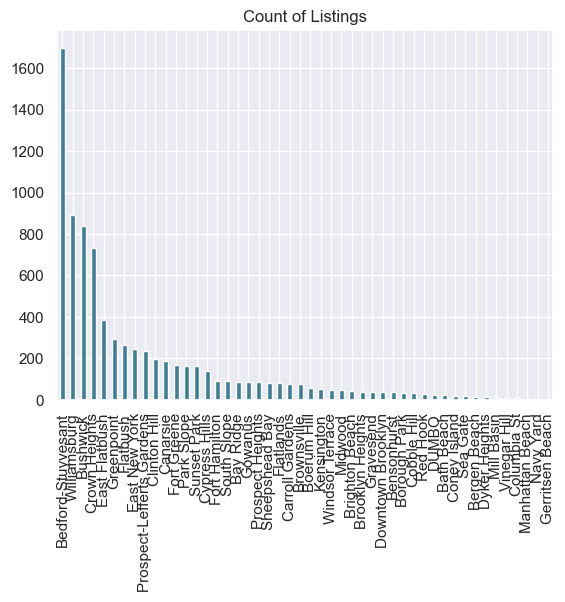

In [14]:
df['Count of Listings'].plot(kind = 'bar', cmap = cmap)
plt.title('Count of Listings')

In [15]:
# Creating DataFrame of population in each metro area in millions from US Census 
pop = pd.read_csv('data/population.csv')
pop.columns = ['City', 'Population']
pop = pop.set_index('City')

df1 = pd.concat([df, pop], axis = 1)
df1 = df1.astype('float')
df1['Normalized by Population'] = df1['Count of Listings'] / df1['Population']
df1.sort_values(['Normalized by Population'], ascending=[False]).reset_index(0)

,index,Count of Listings,Population,Normalized by Population
0,Navy Yard,4.0,0.00005,80000.000000
1,Fort Hamilton,91.0,0.00775,11741.935484
2,Columbia St,7.0,0.00306,2287.581699
3,South Slope,89.0,0.04459,1995.963220
4,Bedford-Stuyvesant,1698.0,1.73842,976.749002
5,Greenpoint,294.0,0.38980,754.232940
6,Gowanus,87.0,0.11867,733.125474
7,Bushwick,840.0,1.20741,695.704028
8,Clinton Hill,195.0,0.28647,680.699550
9,Carroll Gardens,77.0,0.12853,599.081926


In [16]:
z = [(365 - statistics['availability_365']['mean']), df1['Normalized by Population']]
df2 = pd.concat(z, axis=1)
df2

,mean,Normalized by Population
Williamsburg,158.240761,540.736928
Fort Greene,128.733728,513.085190
Bedford-Stuyvesant,123.474087,976.749002
Greenpoint,145.438776,754.232940
Carroll Gardens,164.480519,599.081926
Park Slope,157.582822,197.582942
South Slope,170.561798,1995.963220
Clinton Hill,114.697436,680.699550
Prospect Heights,133.360465,365.490863
Boerum Hill,129.818182,134.251123


Text(0.5, 1.0, 'Popularity and Normalized Listing Count')

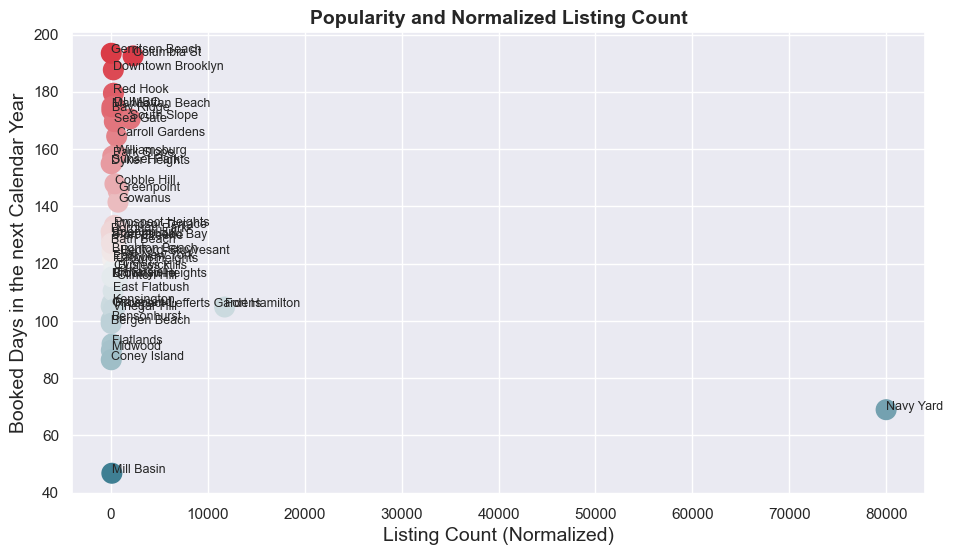

In [17]:
z = [(365 - statistics['availability_365']['mean']), df1['Normalized by Population']]
df2 = pd.concat(z, axis = 1)
x = df2['Normalized by Population']
y = df2['mean']

n = (df2.index.tolist())

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 9)

plt.xlabel('Listing Count (Normalized)', fontsize=14)
plt.ylabel('Booked Days in the next Calendar Year', fontsize=14)
plt.title('Popularity and Normalized Listing Count', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Popularity and Normalized Listing Count')

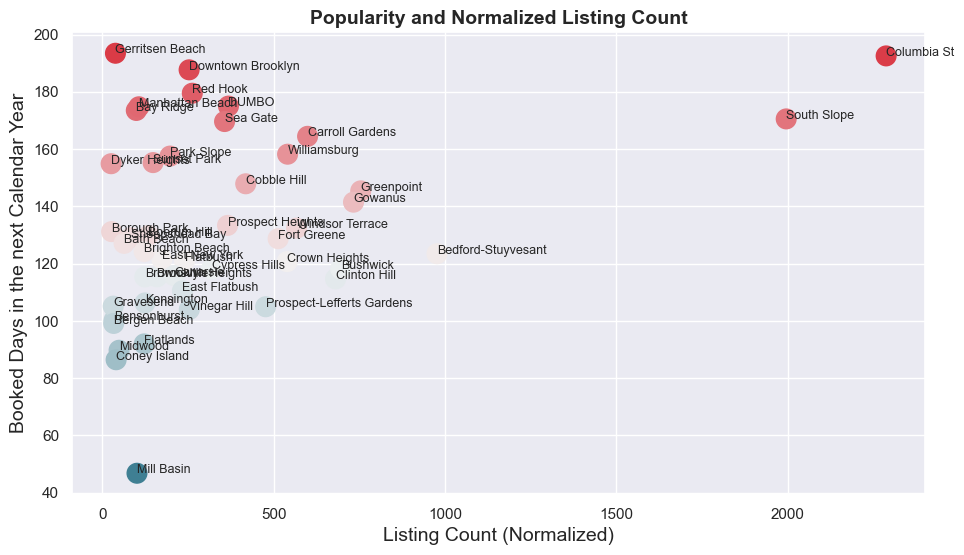

In [68]:

z = [(365 - statistics['availability_365']['mean']), df1['Normalized by Population']]
df2 = pd.concat(z, axis = 1)
df2 = df2.drop(['Navy Yard', 'Fort Hamilton'], errors='ignore')  # Drop Navy Yard and Fort Hamilton if they exist
x = df2['Normalized by Population']
y = df2['mean']

n = (df2.index.tolist())

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 9)

plt.xlabel('Listing Count (Normalized)', fontsize=14)
plt.ylabel('Booked Days in the next Calendar Year', fontsize=14)
plt.title('Popularity and Normalized Listing Count', fontsize=14, fontweight='bold')

In [18]:
pd.DataFrame(statistics['price']['mean']).sort_values(['mean'], ascending=[False])

,mean
location,
Navy Yard,539.500000
Greenpoint,307.557823
Prospect Heights,306.069767
Carroll Gardens,299.480519
Boerum Hill,295.654545
Brooklyn Heights,286.750000
Vinegar Hill,285.200000
Cobble Hill,273.848485
Gowanus,261.551724


Text(0.5, 1.0, 'Price and Normalized Listing Count')

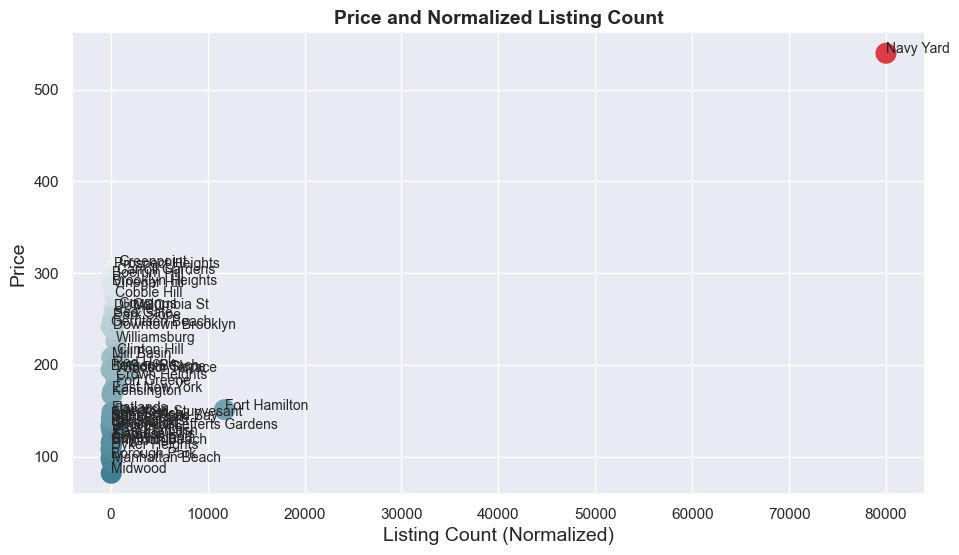

In [13]:
z = [statistics['price']['mean'], df1['Normalized by Population']]
df2 = pd.concat(z, axis = 1)

x = df2['Normalized by Population']
y = df2['mean']

n = (df2.index.tolist())

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Listing Count (Normalized)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Normalized Listing Count', fontsize=14, fontweight='bold')

,const,mean
location,,
Navy Yard,1.0,69.0


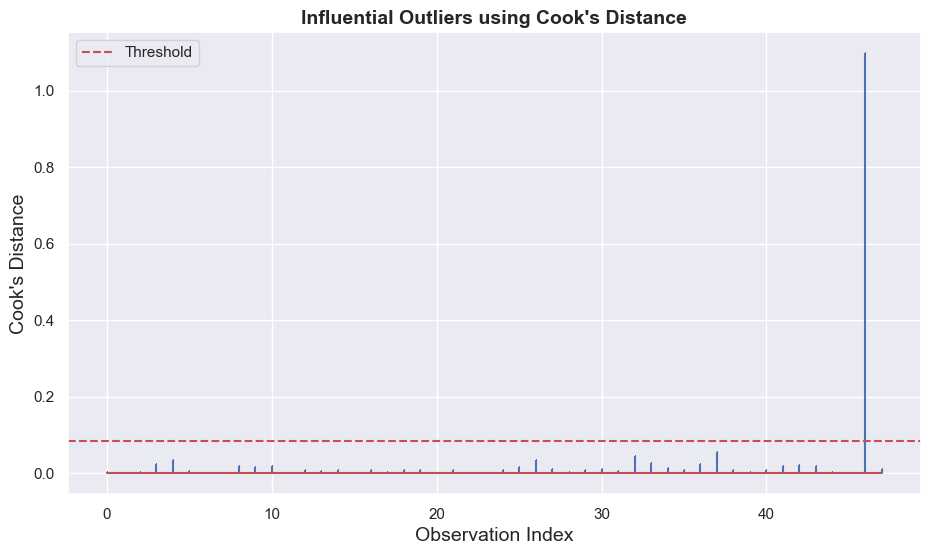

In [22]:
import statsmodels.api as sm

# Prepare the data
x = (365 - statistics['availability_365']['mean'])
y = statistics['price']['mean']
x = sm.add_constant(x)

# Fit the regression model
model = sm.OLS(y, x).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Identify influential outliers
influential_points = cooks_d > 4 / len(x)
outliers = x[influential_points]

# Plot Cook's distance
fig, ax = plt.subplots(figsize=(11, 6))
ax.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
ax.axhline(4 / len(x), color='r', linestyle='--', label="Threshold")
ax.set_xlabel('Observation Index', fontsize=14)
ax.set_ylabel("Cook's Distance", fontsize=14)
ax.set_title("Influential Outliers using Cook's Distance", fontsize=14, fontweight='bold')
ax.legend()

# Display the influential outliers
outliers


In [52]:
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(x))
model_fit = model.fit()

df = pd.concat([x,y],axis=1)
def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

In [64]:
x

,const,mean
location,,
Williamsburg,1.0,158.240761
Fort Greene,1.0,128.733728
Bedford-Stuyvesant,1.0,123.474087
Greenpoint,1.0,145.438776
Carroll Gardens,1.0,164.480519
Park Slope,1.0,157.582822
South Slope,1.0,170.561798
Clinton Hill,1.0,114.697436
Prospect Heights,1.0,133.360465


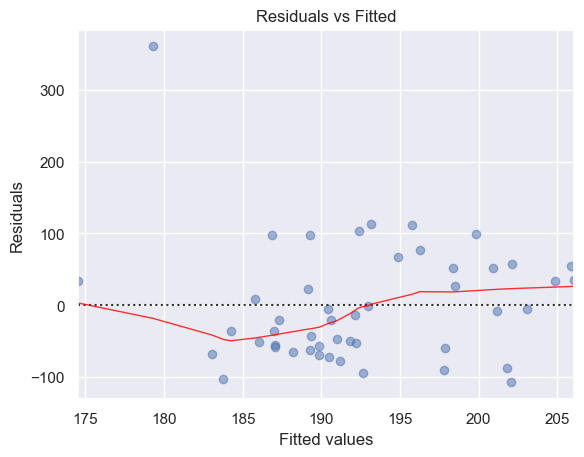

In [65]:
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y=df.iloc[:, -1],
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');



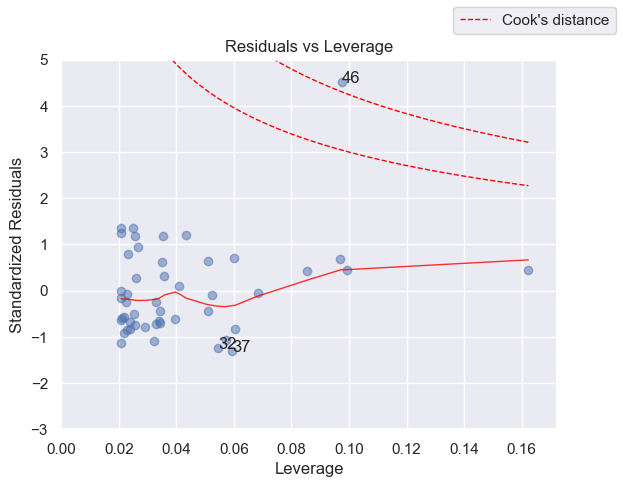

In [66]:
plot_lm_4 = plt.figure()
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(x=model_leverage, y=model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                xy=(model_leverage[i],
                                    model_norm_residuals[i]));

p = len(model_fit.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
    np.linspace(0.001, max(model_leverage), 50),
    'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
    np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

In [14]:
df2.corr()

,mean,Normalized by Population
mean,1.000000,0.606893
Normalized by Population,0.606893,1.000000


In [15]:
x = (365 - statistics['availability_365']['mean'])
x = pd.DataFrame(x).sort_values(['mean'], ascending=[False])
x.columns = ['Availability']
x

,Availability
location,
Gerritsen Beach,193.500000
Columbia St,192.571429
Downtown Brooklyn,187.710526
Red Hook,179.535714
DUMBO,175.045455
Manhattan Beach,174.800000
Bay Ridge,173.522727
South Slope,170.561798
Sea Gate,169.647059


In [16]:
x = pd.DataFrame(statistics['number_of_reviews']['mean']).sort_values(['mean'], ascending=[False])
x.columns = ['Avg. # of Reviews']
x


,Avg. # of Reviews
location,
DUMBO,96.136364
Columbia St,86.142857
Park Slope,73.251534
Manhattan Beach,69.400000
Cobble Hill,68.727273
Carroll Gardens,63.116883
Gowanus,61.206897
Boerum Hill,59.890909
Prospect Heights,59.616279


Text(0.5, 1.0, 'Average Price and Popularity of Listings')

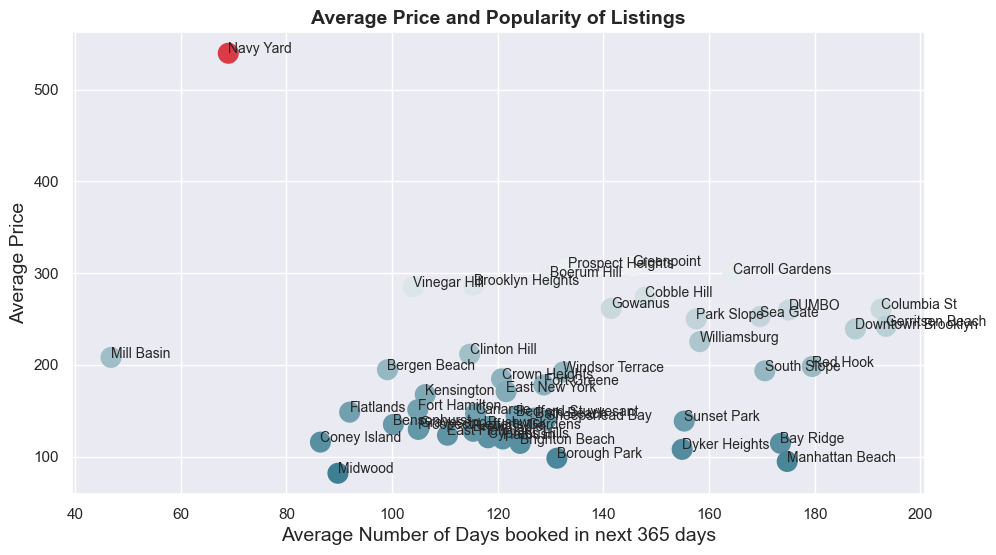

In [17]:
x = (365 - statistics['availability_365']['mean'])
y = statistics['price']['mean']

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Average Number of Days booked in next 365 days', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price and Popularity of Listings', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Average Price and Popularity of Listings (excluding Navy Yard)')

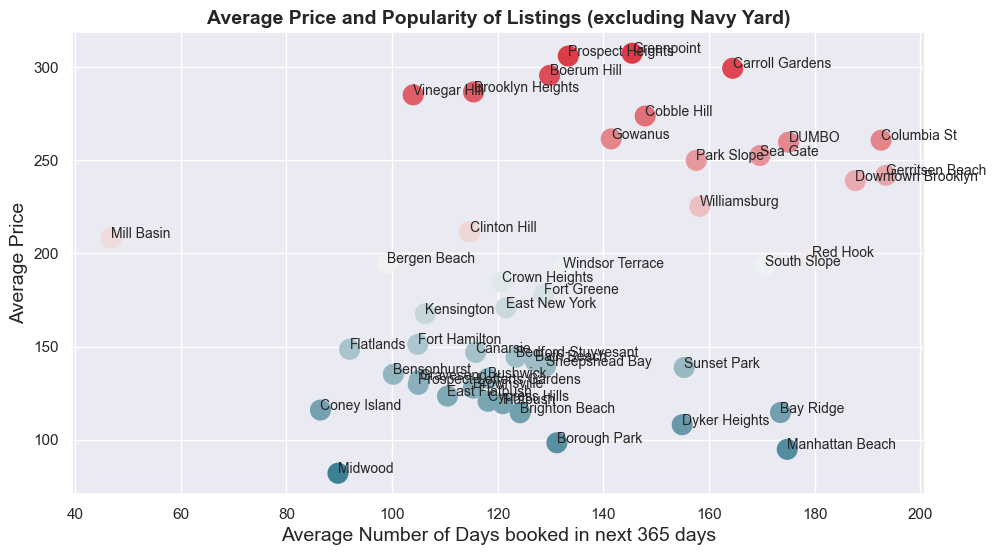

In [71]:
x = (365 - statistics['availability_365']['mean']).drop(['Navy Yard'])
y = statistics['price']['mean'].drop(['Navy Yard'])
n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)

plt.xlabel('Average Number of Days booked in next 365 days', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price and Popularity of Listings (excluding Navy Yard)', fontsize=14, fontweight='bold')

In [19]:
df = pd.concat ([x,y], axis =1 )
df.corr()

,mean,mean
mean,1.000000,0.390595
mean,0.390595,1.000000


Text(0.5, 1.0, 'Price and Average Rating')

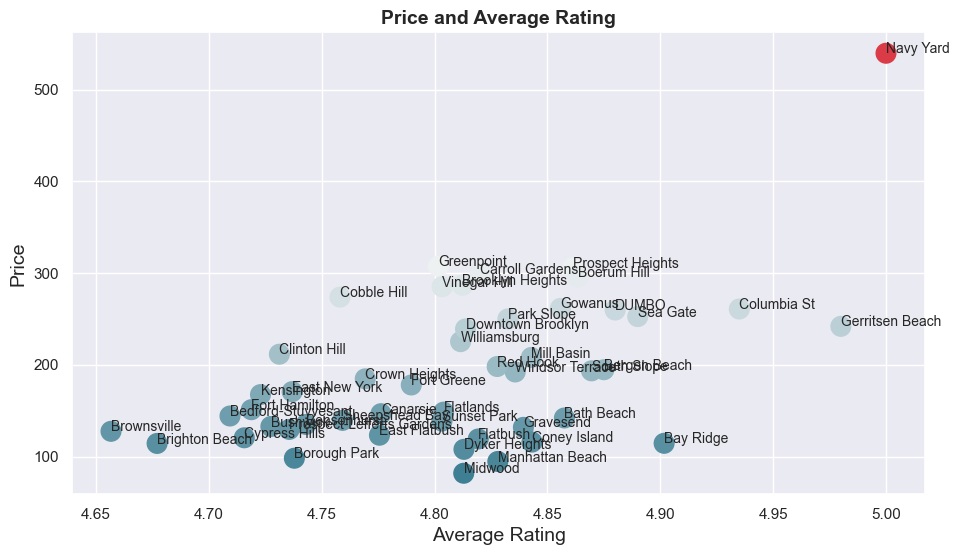

In [20]:
x = statistics['review_scores_rating']['mean']
y = statistics['price']['mean']

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Average Rating', fontsize=14, fontweight='bold')

<Axes: >

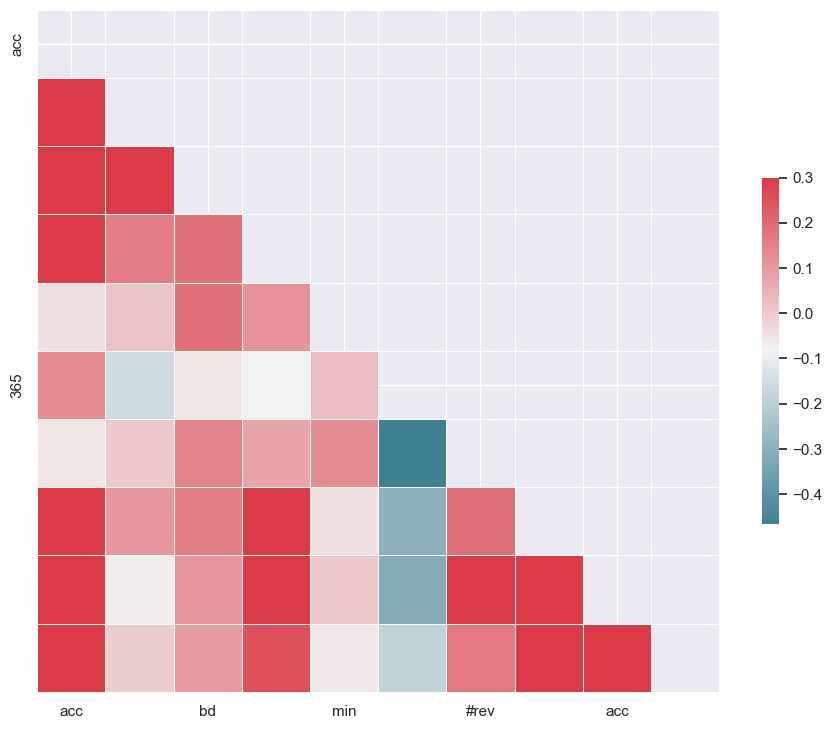

In [21]:
df1 = statistics.iloc[:,[2,7,12,17,22,27,32,37,42,47]].reset_index().drop('location',axis = 1).fillna(0)
df1.columns = df1.columns.droplevel(1)
df1.columns = ['acc', 'bt', 'bd', 'pr', 'min', '365', '#rev', 'rat', "acc", "val"]
#df_zillow = df_zillow['ZHVI_10Year']
#df1 = concat([df1, df_zillow], axis = 1).fillna(0)

coor= df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df1.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df1.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [58]:
ZHVI = pd.read_csv('data/Zip_Zhvi_Summary_AllHomes.csv.gz')
ZHVI.columns

Index(['RegionName', 'Date', 'RegionID', 'State', 'Metro', 'County', 'City',
       'SizeRank', 'Zhvi', 'MoM', 'QoQ', 'YoY', '5Year', '10Year', 'PeakMonth',
       'PeakQuarter', 'PeakZHVI', 'PctFallFromPeak', 'LastTimeAtCurrZHVI'],
      dtype='object')

In [63]:
brooklyn.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [53]:
len(df1)

124

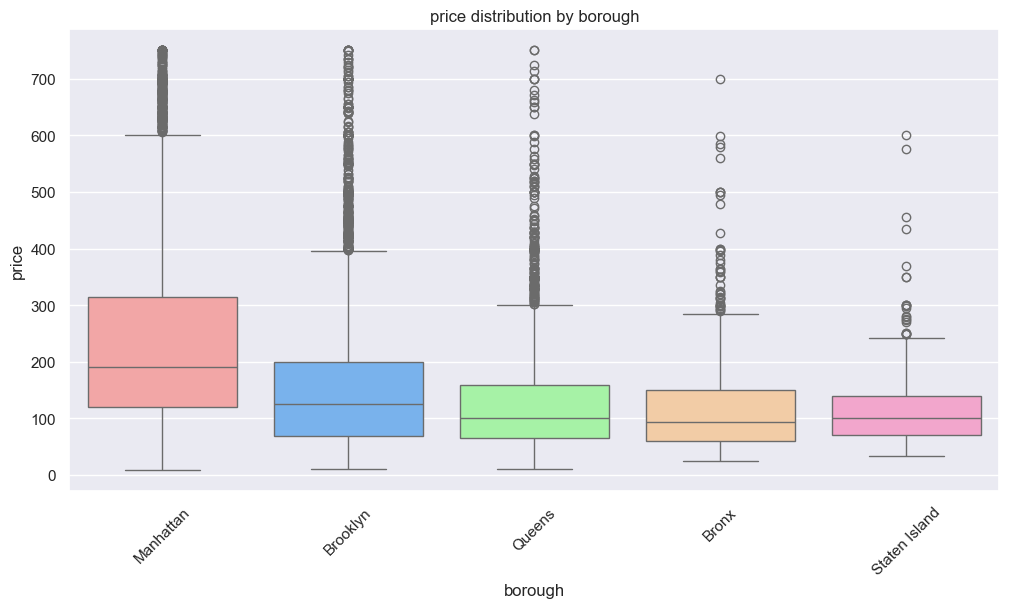

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=nyc, 
            palette=['#ff9999', '#66b2ff', '#99ff99', '#ffcc99', '#ff99cc'])
plt.title('price distribution by borough')
plt.xlabel('borough')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()


In [18]:
m_comp = mc.MultiComparison(nyc['price'], nyc['neighbourhood_group_cleansed']) 
tukey_res = m_comp.tukeyhsd() 

print(tukey_res)


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1      group2     meandiff p-adj    lower    upper   reject
------------------------------------------------------------------
    Bronx      Brooklyn   37.6722    0.0   25.9074   49.437   True
    Bronx     Manhattan  113.9766    0.0  102.3176 125.6355   True
    Bronx        Queens   12.7189 0.0441    0.2062  25.2316   True
    Bronx Staten Island    0.9217    1.0  -21.3878  23.2313  False
 Brooklyn     Manhattan   76.3043    0.0   71.0832  81.5255   True
 Brooklyn        Queens  -24.9533    0.0  -31.8741 -18.0325   True
 Brooklyn Staten Island  -36.7505    0.0  -56.4747 -17.0263   True
Manhattan        Queens -101.2577    0.0  -107.997 -94.5183   True
Manhattan Staten Island -113.0548    0.0 -132.7161 -93.3936   True
   Queens Staten Island  -11.7972 0.5007  -31.9764   8.3821  False
------------------------------------------------------------------


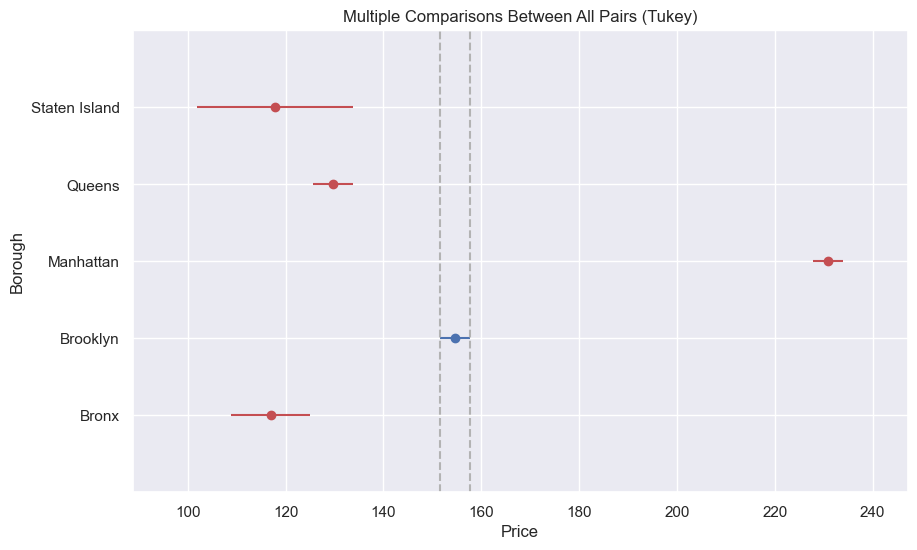

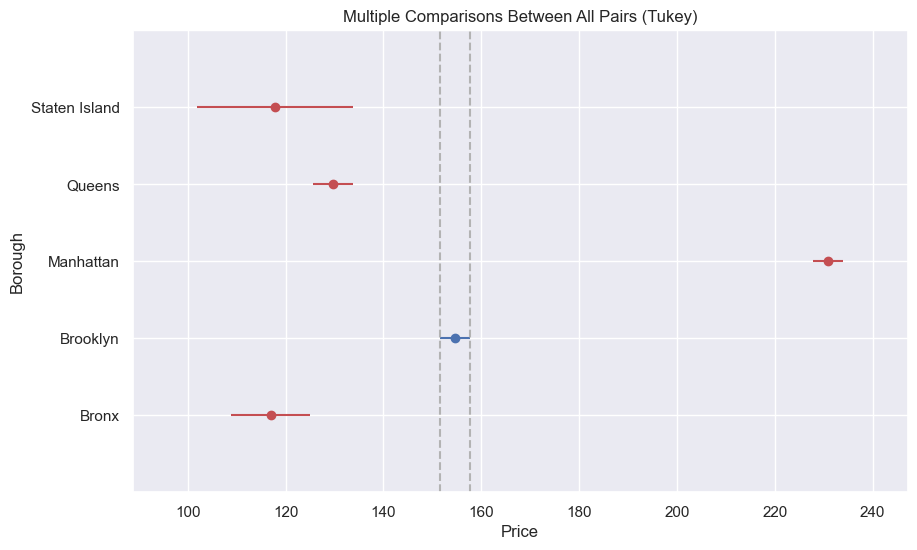

In [19]:
tukey_res.plot_simultaneous(
    xlabel='Price',
    ylabel='Borough',
    comparison_name='Brooklyn',
)


In [20]:
m_comp = mc.MultiComparison(nyc['price'], nyc['room_type']) 
tukey_res = m_comp.tukeyhsd() 

print(tukey_res)



          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1        group2     meandiff p-adj    lower     upper   reject
------------------------------------------------------------------------
Entire home/apt   Hotel room   40.6777    0.0   21.8261   59.5293   True
Entire home/apt Private room -117.9062    0.0 -122.0967 -113.7156   True
Entire home/apt  Shared room -140.0356    0.0 -159.8493 -120.2219   True
     Hotel room Private room -158.5838    0.0  -177.492 -139.6756   True
     Hotel room  Shared room -180.7133    0.0 -207.7788 -153.6478   True
   Private room  Shared room  -22.1295 0.0219   -41.997   -2.2619   True
------------------------------------------------------------------------


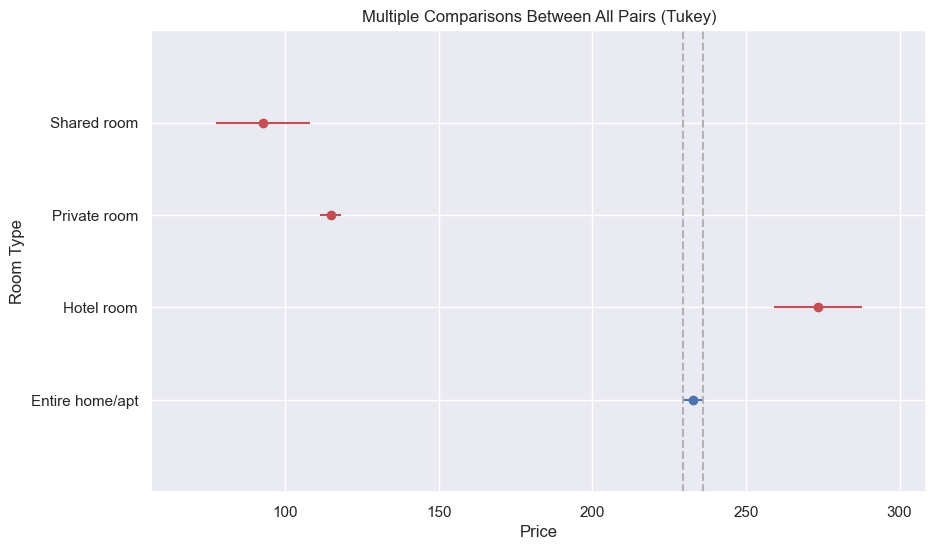

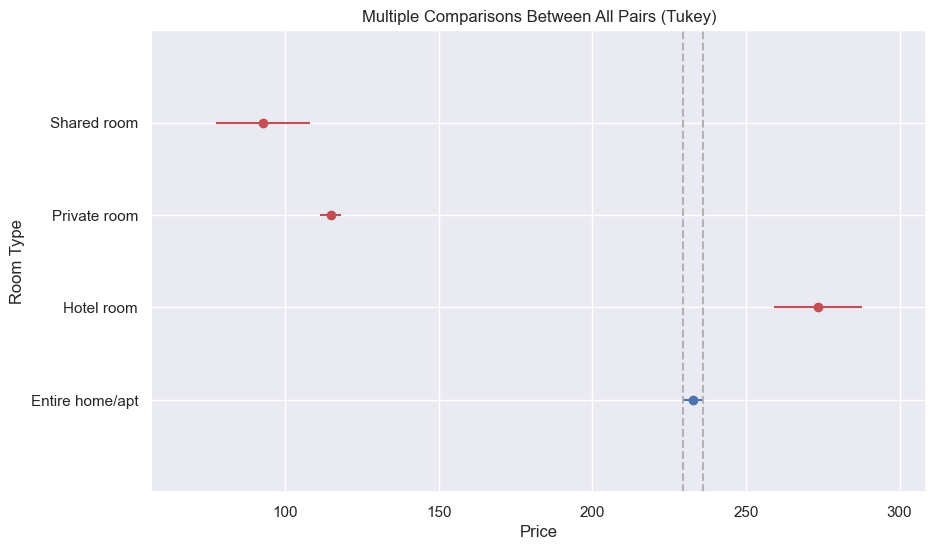

In [23]:
tukey_res.plot_simultaneous(
    xlabel='Price',
    ylabel='Room Type',
    comparison_name='Entire home/apt',
)

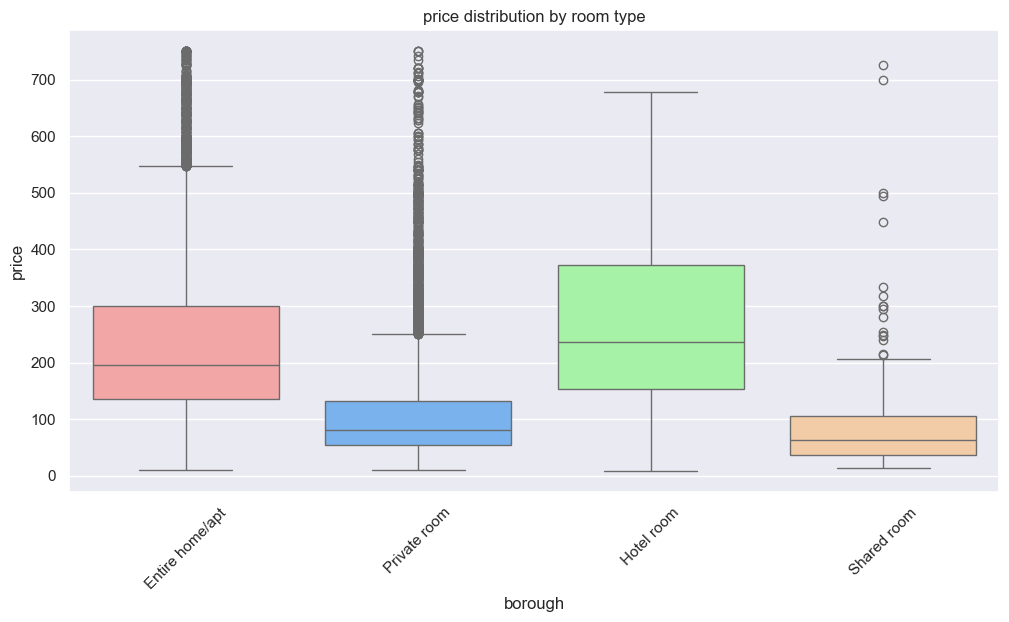

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=nyc, 
            palette=['#ff9999', '#66b2ff', '#99ff99', '#ffcc99' ])
plt.title('price distribution by room type')
plt.xlabel('borough')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

In [26]:
nyc.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20241104040953,2024-11-04,city scrape,Skylit Midtown Castle Sanctuary,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/miso/Hosting-...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.27
1,6848,https://www.airbnb.com/rooms/6848,20241104040953,2024-11-04,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.69,4.58,NaN,f,1,1,0,0,1.04
2,6872,https://www.airbnb.com/rooms/6872,20241104040953,2024-11-04,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.03
3,6990,https://www.airbnb.com/rooms/6990,20241104040953,2024-11-04,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",https://a0.muscache.com/pictures/be6cd5b3-9295...,16800,...,4.95,4.85,4.85,NaN,f,1,0,1,0,1.37
5,7097,https://www.airbnb.com/rooms/7097,20241104040953,2024-11-04,city scrape,"Perfect for Your Parents, With Garden & Patio",Parents/grandparents coming to town or are you...,"Residential, village-like atmosphere. Lots of ...",https://a0.muscache.com/pictures/aaac19fc-4b4d...,17571,...,4.93,4.95,4.82,OSE-STRREG-0000008,t,2,0,2,0,2.16


In [34]:
essentials =pd.read_csv('data/listing_essential_amenities.csv')
essentials = essentials[essentials['listed'] == True]
# Merge essentials and nyc dataframes on id column, keeping only amenities and price
merged_essentials =pd.merge(essentials[['id', 'amenities']], nyc[['id', 'price']], on='id', how='inner')


In [35]:
m_comp = mc.MultiComparison(merged_essentials['price'], merged_essentials['amenities']) 
tukey_res = m_comp.tukeyhsd() 

print(tukey_res)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
  dryer kitchen -19.4587 0.0001 -31.3583  -7.5591   True
  dryer parking -13.7775 0.0363 -27.0017  -0.5533   True
  dryer  washer  20.6295 0.0004   6.9534  34.3055   True
  dryer    wifi -11.8473 0.0416 -23.4135  -0.2811   True
kitchen parking   5.6812 0.7539    -7.28  18.6425  False
kitchen  washer  40.0882    0.0  26.6661  53.5102   True
kitchen    wifi   7.6114 0.3486  -3.6533   18.876  False
parking  washer  34.4069    0.0  19.7977  49.0162   True
parking    wifi   1.9301 0.9937 -10.7258   14.586  False
 washer    wifi -32.4768    0.0 -45.6042 -19.3494   True
--------------------------------------------------------


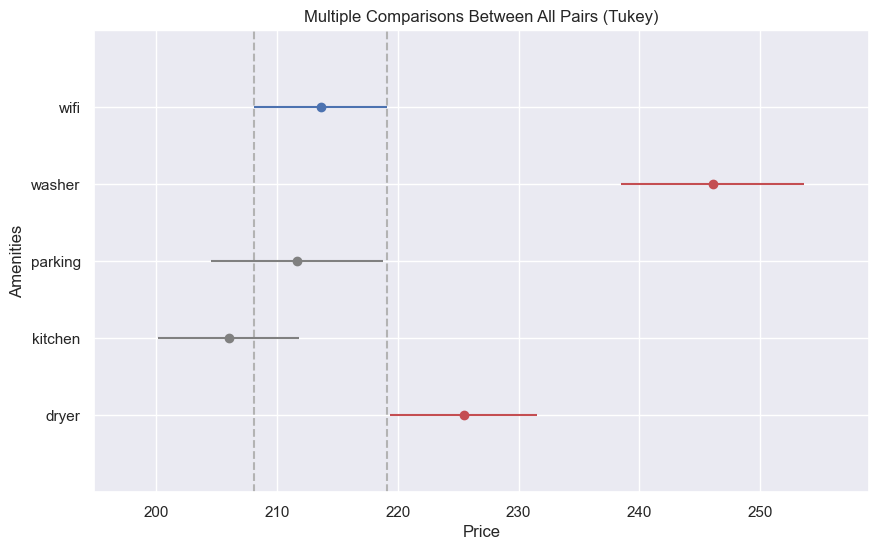

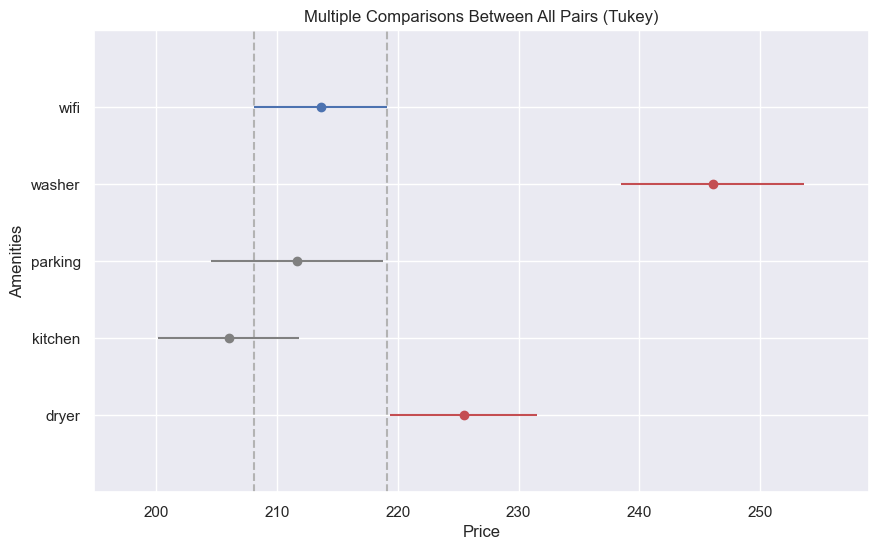

In [36]:
tukey_res.plot_simultaneous(
    xlabel='Price',
    ylabel='Amenities',
    comparison_name='wifi',
)

In [37]:
host_char = pd.read_csv('data/host_char.csv')

In [38]:
host_char.head()
host_char = host_char[host_char['host_is_superhost'].notna()]
host_char = host_char[host_char['price'].notna()]
host_char = host_char.reset_index().drop('index', axis = 1)

# Replace 'f' with 'False' and 't' with 'True' in host_is_superhost column
host_char['host_is_superhost'] = host_char['host_is_superhost'].replace({'f': 'False', 't': 'True'})

host_char = host_char[host_char['price'] <= 750]

In [39]:
m_comp = mc.MultiComparison(host_char['price'], host_char['host_is_superhost']) 
tukey_res = m_comp.tukeyhsd() 

print(tukey_res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 False   True  -7.3925 0.0005 -11.561 -3.2241   True
----------------------------------------------------


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 False   True  -7.3925 0.0005 -11.561 -3.2241   True
----------------------------------------------------


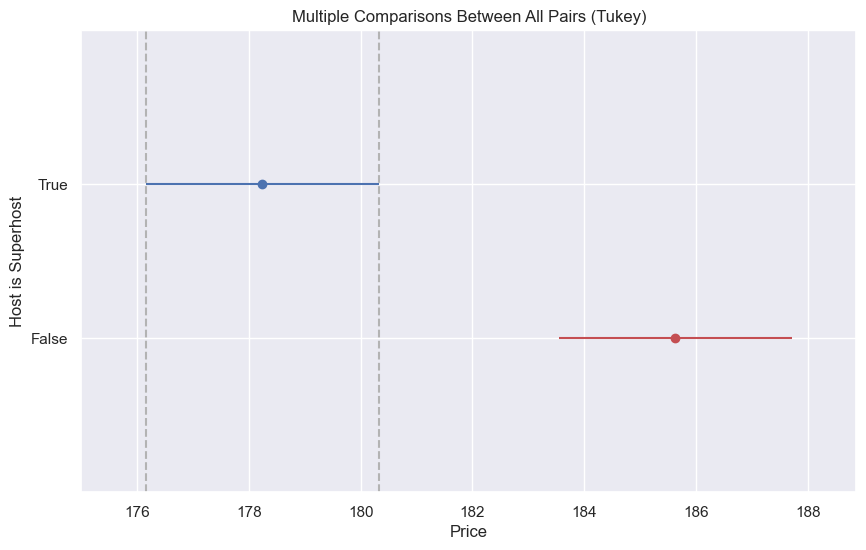

In [40]:
tukey_res.plot_simultaneous(
    xlabel='Price',
    ylabel='Host is Superhost',
    comparison_name='True',
)

print(tukey_res)

In [41]:
bedrooms = pd.read_csv('data/bedroom_price.csv')

bedrooms = bedrooms[bedrooms['bedrooms'] < 9]



In [42]:
bedrooms['bedrooms'].unique()
# Create a mapping dictionary for the values we want to rename
bedroom_mapping = {
    0: 'studio',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight'
}

# Replace values using map, keeping other values unchanged
bedrooms['bedrooms'] = bedrooms['bedrooms'].map(lambda x: bedroom_mapping.get(x, x))

m_comp = mc.MultiComparison(bedrooms['price'], bedrooms['bedrooms']) 
tukey_res = m_comp.tukeyhsd() 

print(tukey_res)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
 eight   five -565.9829 0.9742 -2159.7658    1027.8  False
 eight   four -644.8926 0.9422 -2230.2109  940.4257  False
 eight    one -800.9774 0.8202 -2381.5291  779.5744  False
 eight  seven -658.0909 0.9735 -2503.5223 1187.3405  False
 eight    six -360.1129  0.999 -1990.6277 1270.4019  False
 eight studio -767.3552 0.8537 -2349.1904    814.48  False
 eight  three -635.6553 0.9462 -2218.1399  946.8293  False
 eight    two -707.2468 0.9029 -2288.4175  873.9239  False
  five   four  -78.9097 0.9849   -320.722  162.9026  False
  five    one -234.9945 0.0138  -443.2803  -26.7087   True
  five  seven   -92.108    1.0 -1067.2265  883.0105  False
  five    six    205.87 0.8926  -245.5915  657.3315  False
  five studio -201.3723 0.0966  -419.1836    16.439  False
  five  three  -69.6724 0.9884  -292.1506  152.8058  Fal

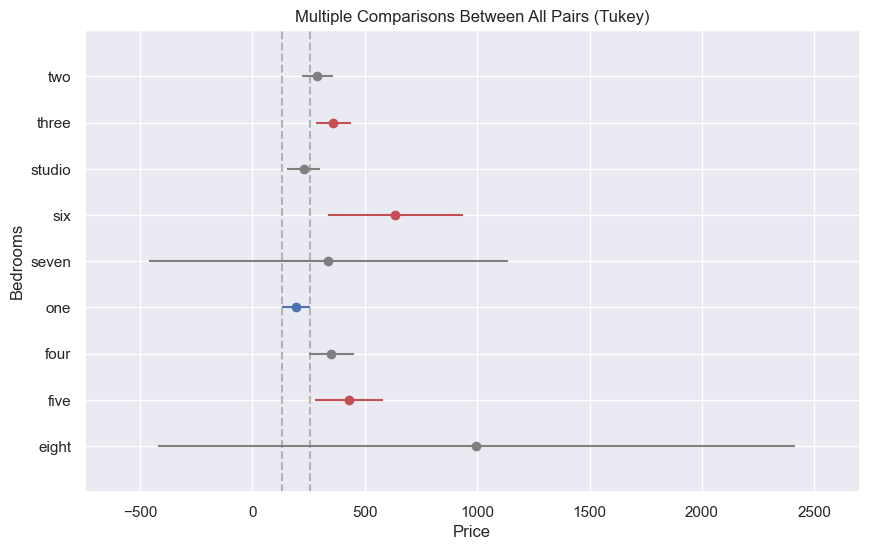

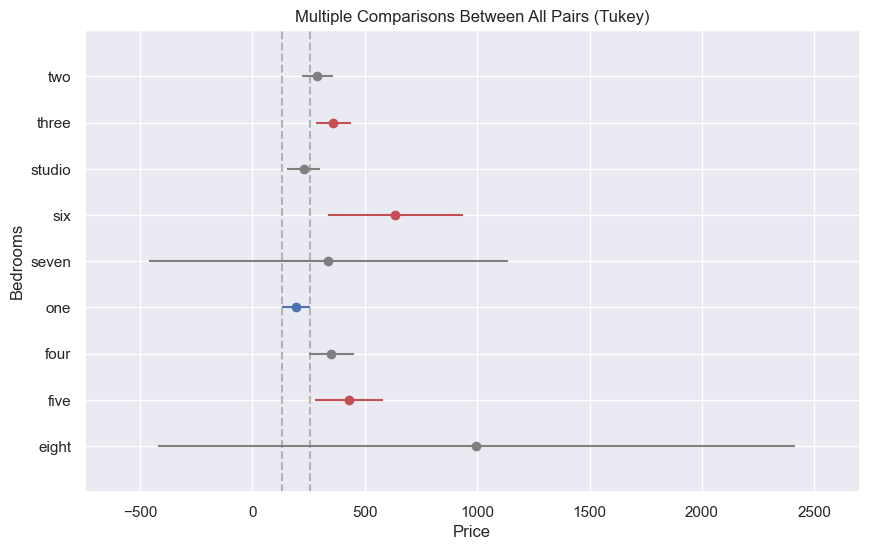

In [43]:
tukey_res.plot_simultaneous(
    xlabel='Price',
    ylabel='Bedrooms',
    comparison_name='one',
)

In [44]:
brooklyn = nyc[nyc['neighbourhood_group_cleansed'] == 'Brooklyn']
brooklyn = brooklyn.reset_index().drop(columns=['index'])
brooklyn = read_data(brooklyn)


In [45]:

def populate_property_agg(v):
    if 'home' in v.lower() or 'guesthouse' in v.lower():
        return 'Home'
    if 'hotel' in v.lower():
        return 'Hotel'
    if 'townhouse' in v.lower():
        return 'Townhouse'
    if 'serviced apartment' in v.lower():
        return 'Serviced Apartment'
    if 'apartment' in v.lower() or 'unit' in v.lower():
        return 'Apartment'
    if 'loft' in v.lower():
        return 'Loft'
    if 'condo' in v.lower():
        return 'Condo'
    else:
        return 'Other'
    return v

brooklyn['property_agg'] = brooklyn["property_type"].apply(populate_property_agg)
brooklyn['property_agg'].value_counts()
brooklyn = brooklyn.drop(columns=['property_type'])

In [46]:
brooklyn['log_price'] = np.log(brooklyn['price'])
brooklyn['number_of_reviews'] = np.log(brooklyn['number_of_reviews'])
brooklyn['availability_365'] = np.log(brooklyn['availability_365'])
# Convert Boolean values to int for specified columns
columns_to_convert = ['wifi', 'parking', 'dryer', 'washer', 'kitchen']
for column in columns_to_convert:
    brooklyn[column] = brooklyn[column].astype(int)

# Create dummies for the host_is_superhost column
host_is_superhost_dummies = pd.get_dummies(brooklyn['host_is_superhost'], prefix='superhost', drop_first=True).astype(int)
brooklyn = pd.concat([brooklyn, host_is_superhost_dummies], axis=1)
brooklyn = brooklyn.drop(columns=['host_is_superhost'])

brooklyn = brooklyn.replace({'room_type': 
                             {'Shared room': 1, 'Private room':2, 'Entire home/apt':3, 'Hotel room': 4}})

brooklyn = brooklyn.replace({'property_agg':
                            {'Home':1, 'Serviced Apartment':2,'Townhouse':3,'Other':4, 'Apartment':5, 'Condo':6, 'Loft':7, 'Hotel':8}})

In [47]:


columns_to_fill = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','bathrooms','bedrooms','availability_365', 'review_scores_value']
for column in columns_to_fill:
    brooklyn[column].replace([np.inf, -np.inf], np.nan, inplace=True)
    brooklyn[column].fillna(0, inplace=True)



In [21]:



brooklyn.to_csv('data/model_data.csv', index=False)


In [45]:
# Check for NaN values
nan_counts = brooklyn.isna().sum()
print("NaN counts per column:")
print(nan_counts[nan_counts > 0])  # Only show columns with NaN values

# Check for infinite values 
inf_counts = np.isinf(brooklyn.select_dtypes(include=np.number)).sum()
print("\nInfinite value counts per column:")
print(inf_counts[inf_counts > 0])  # Only show columns with infinite values

NaN counts per column:
Series([], dtype: int64)

Infinite value counts per column:
Series([], dtype: int64)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     490.0
Date:                Thu, 19 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:00:43   Log-Likelihood:                -6015.3
No. Observations:                7993   AIC:                         1.207e+04
Df Residuals:                    7974   BIC:                         1.220e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

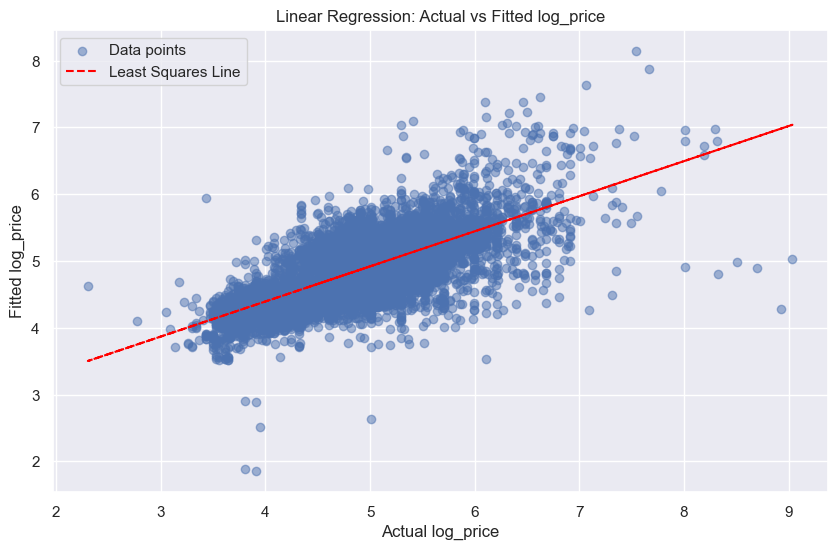

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Define the independent variables (X) and the dependent variable (y)
X = brooklyn[['accommodates', 'room_type', 'minimum_nights', 'dryer', 'kitchen', 'washer', 'number_of_reviews', 'availability_365', 'property_agg', 'bedrooms', 'parking', 'bathrooms', 'review_scores_rating', 'review_scores_value', 'review_scores_accuracy', 'wifi', 'superhost_t']]

# Include an interaction term between 'bedrooms' and 'property_agg'
X['bedrooms_property_agg'] = brooklyn['bedrooms'] * brooklyn['property_agg']

y = brooklyn['log_price']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(y, model.fittedvalues, alpha=0.5, label='Data points')
plt.xlabel('Actual log_price')
plt.ylabel('Fitted log_price')
plt.title('Linear Regression: Actual vs Fitted log_price')

# Add a least squares regression line
m, b = np.polyfit(y, model.fittedvalues, 1)
plt.plot(y, m*y + b, color='red', linestyle='--', label='Least Squares Line')

plt.legend()
plt.show()


In [28]:
# Import the variable importance data from the CSV file

                parking  2.208909
0   review_scores_value  3.485243
1  review_scores_rating  3.704695
2     number_of_reviews  3.172913
3                 dryer  4.660919
4      availability_365  5.276099


KeyError: 'Variable'

<Figure size 1000x600 with 0 Axes>